#### Technical setup
> Skip this section

In [41]:
# @formatter:off

In [42]:
%%time
%reload_ext autoreload
%autoreload 2
# @formatter:on

CPU times: user 5.39 ms, sys: 8.66 ms, total: 14 ms
Wall time: 17.5 ms


# Setup

In [43]:
symbol = 'ETHUSDT'
symbol_k_lines_interval = '1s'
symbol_ask_bid_price_difference = 0.01
price_step_ratio = 0.01

# Ticks

In [44]:
from binance.binance_k_line_loader import load_binance_k_lines
from binance.binance_tick_loader import load_binance_ticks
from chart.ttm_chart import draw_line_chart

k_lines = load_binance_k_lines(f"../../../ttm-data/{symbol}-{symbol_k_lines_interval}-2023-03-*.csv")

ticks = load_binance_ticks(k_lines, symbol_ask_bid_price_difference)

# draw_line_chart(ticks.timestamp, ticks.bid_price, name='Bid Price')
ticks

,timestamp,bid_price,ask_price
0,1677628800000,1605.24,1605.25
1,1677628801000,1605.46,1605.47
2,1677628802000,1605.46,1605.47
3,1677628803000,1605.46,1605.47
4,1677628804000,1605.47,1605.48
...,...,...,...
86395,1680307195000,1821.60,1821.61
86396,1680307196000,1821.61,1821.62
86397,1680307197000,1821.61,1821.62
86398,1680307198000,1821.60,1821.61


# Simulation

In [45]:
from trade.trade_simulator import TradeSimulator

trade_simulator: TradeSimulator = TradeSimulator()
trade_simulator.process_ticks(ticks, price_step_ratio)

# Results


Closed orders count: 300
Cumulative profit: -200.3499999999931


/Users/nikita/Documents/projects/things-team/to-the-moon/ttm-analytics/src/chart/ttm_chart.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


,open_timestamp,type,open_price,close_price,close_timestamp,profit,cumulative_profit
0,1.677640e+12,SELL,1621.31,1637.57,1.677641e+12,-16.26,-16.26
1,1.677641e+12,SELL,1637.56,1654.03,1.677646e+12,-16.47,-32.73
2,1.677646e+12,SELL,1654.02,1637.37,1.677700e+12,16.65,-16.08
3,1.677700e+12,BUY,1637.37,1653.91,1.677706e+12,16.54,0.46
4,1.677706e+12,SELL,1653.91,1670.68,1.677716e+12,-16.77,-16.31
...,...,...,...,...,...,...,...
295,1.680197e+12,BUY,1777.14,1794.99,1.680209e+12,17.85,-200.34
296,1.680209e+12,SELL,1794.99,1813.14,1.680225e+12,-18.15,-218.49
297,1.680225e+12,SELL,1813.13,1794.21,1.680242e+12,18.92,-199.57
298,1.680242e+12,BUY,1794.21,1812.51,1.680267e+12,18.30,-181.27


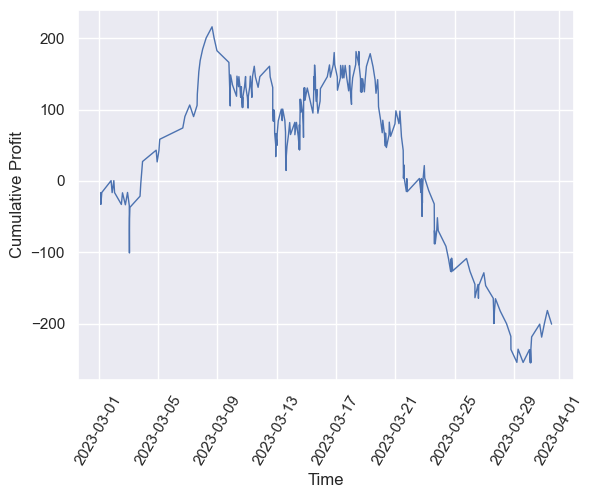

In [46]:
from trade.trade_simulator_order import TradeSimulatorOrder

closed_orders: [TradeSimulatorOrder] = trade_simulator.get_closed_orders()
cumulative_profit: float = trade_simulator.get_cumulative_profit()

profits = trade_simulator.get_profits()

print(f"=========")
print(f"Closed orders count: {len(closed_orders)}")
print(f"Cumulative profit: {cumulative_profit}")
print(f"=========")
draw_line_chart(profits.open_timestamp, profits.cumulative_profit, name='Cumulative Profit')

profits